In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [31]:
import sys
sys.path.insert(0, '/content/drive/My Drive/DeepLearning_LazyProgrammer/')
from utils_NN import sigmoid_cost, relu, error_rate, getBinaryData

In [56]:
class ANN(object):
    def __init__(self, M):
        self.M = M  # number of hidden units

    def forward(self, X):
        Z = relu(X.dot(self.W1) + self.b1)
        return sigmoid(Z.dot(self.W2) + self.b2), Z

    def predict(self, X):
        # converts result from sigmoid into binary (0, 1)
        pY, _ = self.forward(X)
        return np.round(pY)

    def score(self, X, Y):
        prediction = self.predict(X)
        return 1 - error_rate(Y, prediction)

    def fit(self, X, Y, learning_rate=5e-7, reg=1.0, epochs=5000, show_fig=False):
        X, Y = shuffle(X, Y)
        Xval, Yval = X[-1000:], Y[-1000:]
        X, Y = X[:-1000], Y[:-1000]
        N, D = X.shape  # examples, dimensions
        self.W1 = np.random.randn(D, self.M) / np.sqrt(D + self.M)
        self.b1 = np.zeros(self.M)
        self.W2 = np.random.randn(self.M) / np.sqrt(self.M)
        self.b2 = 0

        costs = []
        best_validadion_error = 1
        for i in range(epochs):
            # forward propagation
            pY, Z = self.forward(X)
            # gradient descent step
            pY_Y = pY - Y
            self.W2 -= learning_rate * (Z.T.dot(pY_Y) + reg*self.W2)
            self.b2 -= learning_rate * (np.sum(pY_Y) + reg*self.b2)

            dZ = np.outer(pY_Y, self.W2) * (Z > 0)
            self.W1 -= learning_rate * (X.T.dot(dZ) + reg*self.W2)
            self.b1 -= learning_rate * (dZ.sum(axis=0) + reg*self.b1)

            if i % 200 == 0:
                pYval, _ = self.forward(Xval)
                c = sigmoid_cost(Yval, pYval)
                costs.append(c)
                e = error_rate(Yval, np.round(pYval))
                print(f"i: {i};  cost: {c};  error: {e}")
                if e < best_validadion_error:
                    best_validadion_error = e
        print(f"best_validation_error: {best_validadion_error}")

        if show_fig:
            plt.plot(costs)
            plt.show()

In [53]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [54]:
def main():
    X, Y = getBinaryData()

    X0 = X[Y==0, :]
    X1 = X[Y==1, :]
    X1 = np.repeat(X1, 9, axis=0)  # because there are a lot less ones!
    X = np.vstack([X0, X1])
    Y = np.array([0]*len(X0) + [1]*len(X1))

    model = ANN(100)
    model.fit(X, Y, show_fig=True)

i: 0;  cost: 695.4254444987174;  error: 0.482
i: 200;  cost: 647.4145422110978;  error: 0.351
i: 400;  cost: 626.5495731667543;  error: 0.331
i: 600;  cost: 612.3324639344823;  error: 0.325
i: 800;  cost: 600.7568563651477;  error: 0.307
i: 1000;  cost: 590.7307112726661;  error: 0.293
i: 1200;  cost: 581.6844115861884;  error: 0.291
i: 1400;  cost: 573.2094648151849;  error: 0.279
i: 1600;  cost: 565.1065581582286;  error: 0.272
i: 1800;  cost: 557.401737628722;  error: 0.263
i: 2000;  cost: 549.880477495067;  error: 0.257
i: 2200;  cost: 542.5305813372589;  error: 0.252
i: 2400;  cost: 535.3532884431968;  error: 0.253
i: 2600;  cost: 528.4898121875914;  error: 0.243
i: 2800;  cost: 521.7197341409247;  error: 0.24
i: 3000;  cost: 515.075663792841;  error: 0.237
i: 3200;  cost: 508.6210141066409;  error: 0.235
i: 3400;  cost: 502.2761084170597;  error: 0.233
i: 3600;  cost: 496.0375757072277;  error: 0.23
i: 3800;  cost: 489.90964385604565;  error: 0.225
i: 4000;  cost: 483.84824734038

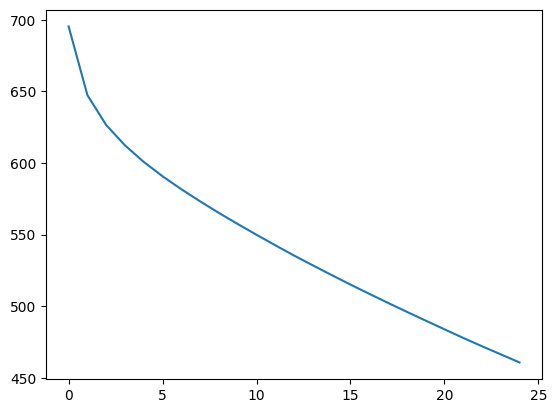

In [57]:
if __name__ == '__main__':
    main()